# Introduction
In this excercise, you will get acquainted with:

1. Scikit-image
2. OpenCV


###About limits of Google Colab:   

The 12-hour limit is for a continuous assignment of VM. It means we can use GPU compute even after the end of 12 hours by connecting to a different VM.

### Authors and Lecturers:
* [Jakub Špaňhel](mailto:ispanhel@fit.vutbr.cz)
* [Martin Šůstek](mailto:isustek@fit.vutbr.cz)

---

###Source(s):
* [Real Python](https://realpython.com/)
* [Learn Python](https://www.learnpython.org/en/Welcome)
* [Python for Beginners](https://www.pythonforbeginners.com/)
* [Towards Data Science](https://towardsdatascience.com/programming/home)
* [Digital Ocean](https://www.digitalocean.com/community/tutorial_series/how-to-code-in-python-3)
* [Python Docs](https://docs.python.org/3.6/)
---
* [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [Numpy Docs](https://docs.scipy.org/doc/numpy/)

#Data preparation
Data preparation for this notebook.

In [ ]:
# List files 
!ls

In [3]:
#Data preparation
!rm -rf *
!wget https://www.fit.vutbr.cz/~ispanhel/data/BISSIT/assets.zip
!unzip assets.zip

--2021-07-13 05:32:08--  https://www.fit.vutbr.cz/~ispanhel/data/BISSIT/assets.zip
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158548881 (151M) [application/zip]
Saving to: ‘assets.zip’

assets.zip          100%[===================>] 151.20M  2.54MB/s    in 60s     

2021-07-13 05:33:09 (2.53 MB/s) - ‘assets.zip’ saved [158548881/158548881]

Archive:  assets.zip
   creating: assets/
  inflating: assets/BigBuckBunny.mp4  
  inflating: assets/example_lps.json  
 extracting: assets/Lenna_test_image.png  
  inflating: assets/media_info.json  
  inflating: assets/sample.txt       
  inflating: assets/taxable.csv      


#Scikit-image

Scikit-image provides some basic functions to work with images. For example, it has functions to read images from disk into numpy arrays, to write numpy arrays to disk as images, and to resize images. Here is a simple example that showcases these functions:

In [ ]:
import numpy as np
from skimage.io import imread, imsave, imshow
from skimage.transform import resize
path = "http://www.fit.vutbr.cz/~ispanhel/data/BISSIT/Lenna_test_image.png"
#path = "assets/Lenna_test_image.png"

# Read an JPEG image into a numpy array
## img = imread('Lenna_test_image.png')              
img = np.asarray(imread(path))

print(img.dtype, img.shape)  # Prints "uint8 (512, 512, 3)"
imshow(img)

In [ ]:
# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (512, 512, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = (img / 255) * [1.0, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = resize(img_tinted, (300, 300))
imshow(img_tinted)

# Write the tinted image back to disk
# imsave('assets/cat_tinted.jpg', img_tinted)

#OpenCV
OpenCV is a library of programming functions mainly aimed at real-time computer vision. It provides big set of function for manipulating images, videos and well-known methods for image processing, computer vision even machine learning in general.

(512, 512, 3)
<class 'numpy.ndarray'>


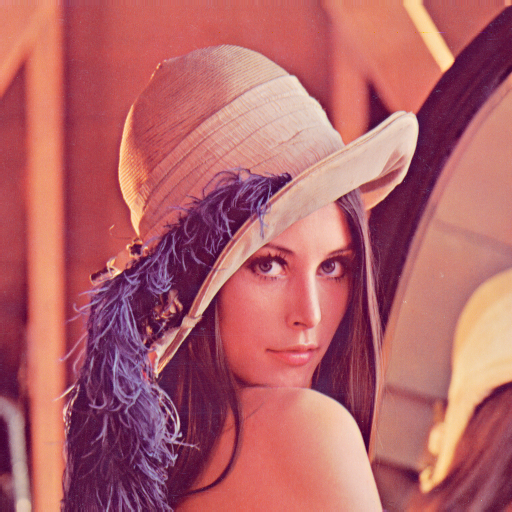

In [3]:
import cv2
from google.colab.patches import cv2_imshow 

# Load image
img = cv2.imread("assets/Lenna_test_image.png")


# Check shape and show image
print(img.shape)
print(type(img))

# cv2.imshow # does not work in Colab
cv2_imshow(img)

## Image manipulations


In [ ]:
# Create a grayscale
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

In [ ]:
# Split to individual channels
blue, green, red = cv2.split(img)

cv2_imshow(blue)
cv2_imshow(green)
cv2_imshow(red)


# Merging channels
merged_img = cv2.merge((blue,green,red))
cv2_imshow(merged_img)

In [ ]:
# Change all red pixels to maximal value
merged_img[:,:,2] = 255
cv2_imshow(merged_img)

In [ ]:
# Save image
cv2.imwrite("Lenna_red.png",merged_img)

In [11]:
!ls

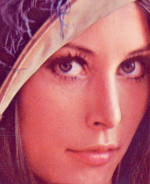

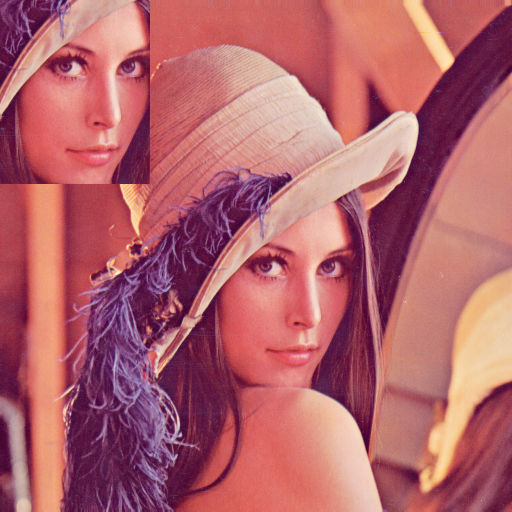

In [20]:
# Image ROI
face = img[200:384, 200:350] # [H, W]
cv2_imshow(face)

face.shape

In [ ]:
img[0:184,0:150] = face
cv2_imshow(img)

## Image processing

## Processing video files

In [ ]:
# Working with video files

import cv2
from google.colab.patches import cv2_imshow 

cap = cv2.VideoCapture("assets/BigBuckBunny.mp4")

while cap.isOpened():
    ret, image = cap.read()

    if not ret:
      break

    # YOU CAN DO IMAGE PROCESSING HERE

    cv2_imshow(image) # Note cv2_imshow, not cv2.imshow

    cv2.waitKey(10) & 0xff

cv2.destroyAllWindows()
cap.release()

## Image processing for machine learning

Preparation just for this example

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Preparation just for this example
img = cv2.imread("assets/Lenna_test_image.png")

sample1 = img[200:384, 200:350]
sample2 = img[20:150, 350:451]
sample3 = img[0:240, 125:400]
sample4 = img[200:384, 384:511]


cv2_imshow(sample1)
cv2_imshow(sample2)
cv2_imshow(sample3)
cv2_imshow(sample4)

Creating image batch

In [25]:
import numpy as np

batch = np.zeros([4, 128, 128, 3])
batch.shape

(4, 128, 128, 3)